In [4]:
from data_import import import_user_ratings, import_semantic, generate_random_user_ratings_input
from bliga import BookRecommendationSystem
from tuner import HyperparameterTuner
from evaluation import Evaluator


# File paths for data import
user_ratings_file = "user_ratings.csv"
semantic_file = "semantic.csv"

# Import data
user_ratings = import_user_ratings(user_ratings_file)
semantic = import_semantic(semantic_file)

# Generate user_ratings_input
user_ratings_input = generate_random_user_ratings_input(200)

OSError: [Errno 22] Invalid argument: 'dataset/user_ratings.csv'

In [2]:
# Using BookRecommendationSystem
recommender = BookRecommendationSystem(user_ratings_input, user_ratings, semantic)

# Set the parameters for the genetic algorithm
pop_size = 50
mutation_rate = 0.2
num_generations = 10
crossover_func = "one_point"
mutation_func = "swap"
no_rec = 10

# Call the genetic_algorithm method with appropriate arguments
best_solution, semratings_dict, fitness_scores_dict, best_solutions_by_generation = recommender.genetic_algorithm(
    pop_size, mutation_rate, num_generations, crossover_func, mutation_func, no_rec
)


'\n# Using Tuner\ntuner = HyperparameterTuner(user_ratings_input, user_ratings, semantic)\ntuner.run_tuning(\n    population_size_range=[50, 100, 150],\n    mutation_rate_range=[0.01, 0.02, 0.03],\n    num_generations_range=[50, 100, 150],\n    crossover_funcs=["one_point", "uniform"],\n    mutation_funcs=["swap", "inversion"]\n)\ntuner.plot_graphs()\n'

In [7]:
fitness_scores_dict[best_solution]['predicted_rating_list']

[2.9537422615557363,
 2.745434807249456,
 2.782762658790705,
 2.867127093783701,
 2.614830188312742,
 3.0999773819037606,
 2.850900931062796,
 3.0936647263641035,
 2.874711446488021,
 2.6799942708491686]

In [6]:
fitness_scores_dict

{(72,
  101,
  163,
  146,
  10,
  21,
  161): {'total_predicted_rating': 20.232917201163634, 'predicted_rating_list': [2.5298165191341555,
   2.6069788841386696,
   2.9116736325970147,
   2.830462967800603,
   3.071100489632776,
   3.1150944141398007,
   3.1677902937206133]},
 (163,
  103,
  133,
  101,
  81,
  140,
  23): {'total_predicted_rating': 18.70012174987337, 'predicted_rating_list': [2.9116736325970147,
   2.116220042530374,
   2.243110520964807,
   2.6069788841386696,
   2.694398563453769,
   2.960360468473481,
   3.1673796377152557]},
 (26, 8, 148, 143, 129, 194, 56): {'total_predicted_rating': 18.42925545330357,
  'predicted_rating_list': [2.7584170897749667,
   2.1497422739311833,
   3.199851819997653,
   2.5137428411719784,
   2.070475337306837,
   2.4586844312620286,
   3.278341659858921]},
 (140, 68, 194, 2, 41, 94, 81): {'total_predicted_rating': 18.71010504352008,
  'predicted_rating_list': [2.960360468473481,
   2.071142418525167,
   2.4586844312620286,
   2.561250

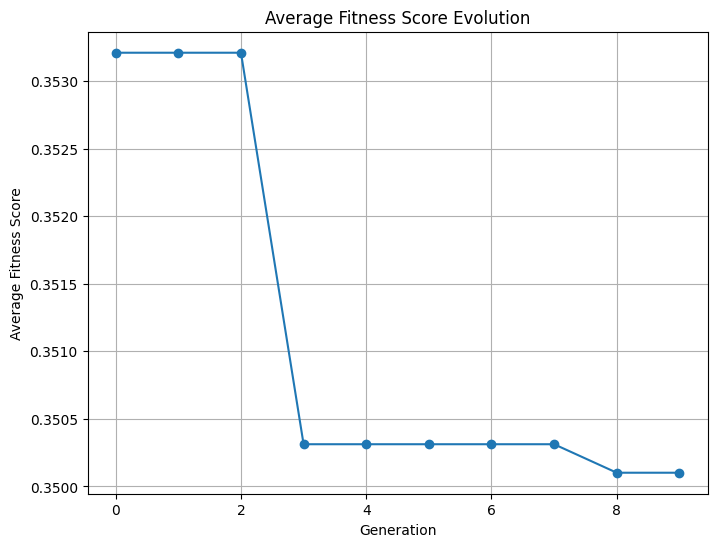

<Figure size 640x480 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
# Plot the fitness graph showing how the fitness score evolves over generations
recommender.plot_best_solutions_by_generation(fitness_scores_dict, best_solutions_by_generation)
plt.savefig('average_fitness_graph_ver2.png')

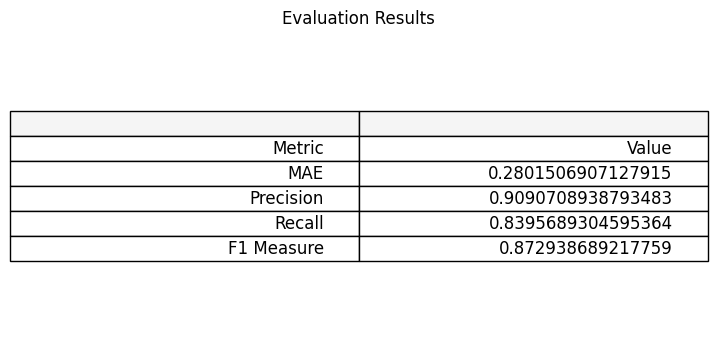

In [2]:
evaluator = Evaluator()
evaluator.evaluation(user_ratings)
plt.savefig('evaluation_graph.png')
